In [0]:
!cp drive/My\ Drive/Colab\ Notebooks/video_data_4_classes.zip ./data/

In [0]:
!unzip ./data/video_data_4_classes.zip -d ./data/

Archive:  ./data/video_data_4_classes.zip
   creating: ./data/new data/
   creating: ./data/new data/SkateBoarding/
  inflating: ./data/new data/SkateBoarding/708-75070.avi  
  inflating: ./data/new data/SkateBoarding/711-66044.avi  
  inflating: ./data/new data/SkateBoarding/708-77009.avi  
  inflating: ./data/new data/SkateBoarding/1058-22003.avi  
  inflating: ./data/new data/SkateBoarding/761-39000.avi  
  inflating: ./data/new data/SkateBoarding/947-58108.avi  
  inflating: ./data/new data/SkateBoarding/860-37150.avi  
  inflating: ./data/new data/SkateBoarding/947-70005.avi  
  inflating: ./data/new data/SkateBoarding/860-2729.avi  
   creating: ./data/new data/Running/
  inflating: ./data/new data/Running/2670-5_70111.avi  
  inflating: ./data/new data/Running/5238-17_701141.avi  
  inflating: ./data/new data/Running/5238-17_700000.avi  
  inflating: ./data/new data/Running/3687-17_70245.avi  
  inflating: ./data/new data/Running/5117-8_70157.avi  
  inflating: ./data/new data/R

In [0]:
!cp drive/My\ Drive/Colab\ Notebooks/modal.hdf5 .

In [0]:
import cv2

In [0]:
N_FRAMES = 10

In [0]:
!ls -a ./data/video_data/ #rm -r ./data/video_data/.ipynb_checkpoints

 .   ..  'Golf Swinging'  'Riding Horse'   Running   SkateBoarding


In [0]:
from feature_extractor import FeatureExtractor

Using TensorFlow backend.


In [0]:
f = FeatureExtractor(N_FRAMES,'modal.hdf5')

In [0]:
f.model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 512)         0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [0]:
f.load_from_directory('./data/video_data')

[INFO] ./data/video_data/Golf Swinging/7616-7_70270.avi completed
[INFO] ./data/video_data/Golf Swinging/RF1-13678_70045.avi completed
[INFO] ./data/video_data/Golf Swinging/RF1-13209_70050.avi completed
[INFO] ./data/video_data/Golf Swinging/RF1-13588_70046.avi completed
[INFO] ./data/video_data/Golf Swinging/RF1-13428_70288.avi completed
[INFO] ./data/video_data/Golf Swinging/3283-8_701201.avi completed
[INFO] ./data/video_data/Golf Swinging/7603-4_70159.avi completed
[INFO] ./data/video_data/Golf Swinging/7608-12_70275.avi completed
[INFO] ./data/video_data/Golf Swinging/RF1-13157_70040.avi completed
[INFO] ./data/video_data/Golf Swinging completed
[INFO] ./data/video_data/SkateBoarding/947-70005.avi completed
[INFO] ./data/video_data/SkateBoarding/1058-22003.avi completed
[INFO] ./data/video_data/SkateBoarding/860-37150.avi completed
[INFO] ./data/video_data/SkateBoarding/711-66044.avi completed
[INFO] ./data/video_data/SkateBoarding/708-77009.avi completed
[INFO] ./data/video_data

In [0]:
X, y = f.load_dataset()

In [0]:
!cp drive/My\ Drive/Colab\ Notebooks/features_file.zip .

In [0]:
!unzip features_file.zip

Archive:  features_file.zip
  inflating: lstm_y.npy              
  inflating: lstm_x.npy              


In [0]:
import numpy as np

In [0]:
X, y = np.load('lstm_x.npy'),np.load('lstm_y.npy')

In [0]:
len(X)

960

In [0]:
len(y)

960

In [0]:
X[0].shape


(10, 512)

In [0]:
X

array([[[ 0.        ,  0.        ,  5.2694244 , ..., 25.1015    ,
         10.996999  , 16.858883  ],
        [ 0.        ,  0.        ,  1.2669399 , ..., 25.13636   ,
          8.402225  , 16.30759   ],
        [ 0.        ,  0.        ,  4.1593122 , ..., 24.067205  ,
         11.625109  , 18.555912  ],
        ...,
        [ 0.        ,  0.        ,  7.884647  , ..., 25.015656  ,
         10.686768  ,  8.5287695 ],
        [ 0.        ,  0.        ,  9.419984  , ..., 27.556696  ,
         10.127349  ,  3.7726932 ],
        [ 0.        ,  0.        ,  9.392706  , ..., 33.99073   ,
          9.83689   ,  6.58963   ]],

       [[ 0.        ,  0.        ,  1.2669399 , ..., 25.13636   ,
          8.402225  , 16.30759   ],
        [ 0.        ,  0.        ,  4.1593122 , ..., 24.067205  ,
         11.625109  , 18.555912  ],
        [ 0.        ,  0.        ,  1.8632114 , ..., 27.827427  ,
         14.60748   , 13.117829  ],
        ...,
        [ 0.        ,  0.        ,  9.419984  , ..., 2

In [0]:
len(y[0])

4

In [0]:
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
encoder = OneHotEncoder(sparse=False)

In [0]:
X,y = np.array(X),np.array(y)

In [0]:
y = y.reshape(len(y), 1)

In [0]:
y = encoder.fit_transform(y)

In [0]:
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [0]:
import numpy as np

In [0]:
np.save("features/lstm_x.npy",X)

In [0]:
np.save("features/lstm_y.npy",y)

In [0]:
import shutil

In [0]:
shutil.make_archive("features_file",'zip','features')

'/content/features_file.zip'

In [0]:
!cp features_file.zip drive/My\ Drive/Colab\ Notebooks

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
f.actual.classes_

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from keras.layers import Bidirectional,LSTM,Dense,Dropout,Input
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(2048, return_sequences=False,
                input_shape=X_train.shape[1:],#(N_FRAMES,512),
                dropout=0.5)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [0]:
#model.build(input_shape=X_train.shape)
model.summary()

In [0]:
model.compile(optimizer='adam',metrics=['accuracy'],loss="categorical_crossentropy")

In [0]:
# from keras.callbacks import ModelCheckpoint
# import os
# checkpointer = ModelCheckpoint(
#         filepath=os.path.join('checkpoints', 'lstmmodelbest-.{epoch:03d}-{accuracy:.3f}.hdf5'),
#         verbose=1,monitor='accuracy',
#         save_best_only=True)

In [0]:
model.summary()

In [0]:
history = model.fit(
            X_train,
            y_train,
            validation_data=(X_test, y_test),
            epochs=5)

Train on 643 samples, validate on 317 samples
Epoch 1/5
643/643 [==============================] - 97s 150ms/step - loss: 0.5821 - acc: 0.7543 - val_loss: 0.0683 - val_acc: 0.9653
Epoch 2/5
643/643 [==============================] - 91s 142ms/step - loss: 0.1223 - acc: 0.9518 - val_loss: 0.1046 - val_acc: 0.9590
Epoch 3/5
643/643 [==============================] - 90s 141ms/step - loss: 0.0932 - acc: 0.9673 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 4/5
643/643 [==============================] - 92s 143ms/step - loss: 0.0351 - acc: 0.9907 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 5/5
643/643 [==============================] - 92s 143ms/step - loss: 0.0221 - acc: 0.9953 - val_loss: 1.2138e-04 - val_acc: 1.0000


In [0]:
from matplotlib import pyplot as plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


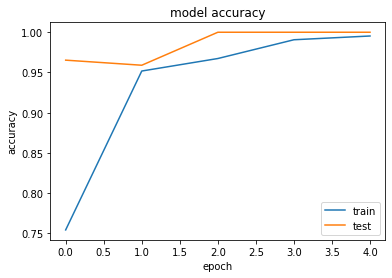

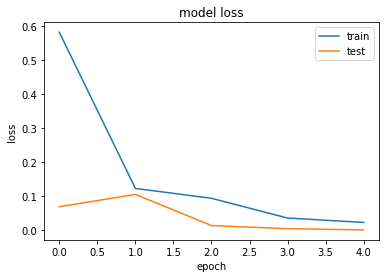

In [0]:
print(history.history.keys())
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])#, loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])#, loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 4096)              41959424  
_________________________________________________________________
dense_9 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 2052      
Total params: 44,059,140
Trainable params: 44,059,140
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save('bi-lstm.hdf5')

In [0]:
!cp bi-lstm.hdf5 drive/My\ Drive/Colab\ Notebooks/

In [0]:
loss,accuracy = model.evaluate(X_train,y_train)

643/643 [==============================] - 15s 24ms/step


In [0]:
print("accuracy on train dataset %.3f\nLoss %.3f"%(accuracy*100,loss*100))

accuracy on train dataset 100.000
Loss 0.006
